In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cd

C:\Users\danie


In [82]:
birth = pd.read_csv("Downloads/Birth Prediction/Births2015.csv",index_col=1, parse_dates=[0], squeeze=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_2000\91660664.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  birth = pd.read_csv("Downloads/Birth Prediction/Births2015.csv",index_col=1, parse_dates=[0], squeeze=True)


In [83]:
birth.head()

,Unnamed: 0,births,wday,year,month,day_of_year,day_of_month,day_of_week
date,,,,,,,,
2015-01-01,1,8068,Thu,2015,1,1,1,5
2015-01-02,2,10850,Fri,2015,1,2,2,6
2015-01-03,3,8328,Sat,2015,1,3,3,7
2015-01-04,4,7065,Sun,2015,1,4,4,1
2015-01-05,5,11892,Mon,2015,1,5,5,2


In [27]:
birth.drop(labels=["Unnamed: 0","wday","year","month","day_of_year","day_of_month","day_of_week"],axis=1, inplace=True)

In [28]:
birth.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [34]:
birth.squeeze()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892
...,...
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458


In [35]:
type(birth)

pandas.core.frame.DataFrame

In [36]:
series_values = birth.values

In [37]:
type(series_values)

numpy.ndarray

In [39]:
birth.size

365

In [40]:
birth.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


In [41]:
birth.tail()

,births
date,
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458
2015-12-30,13100
2015-12-31,11608


<AxesSubplot:xlabel='date'>

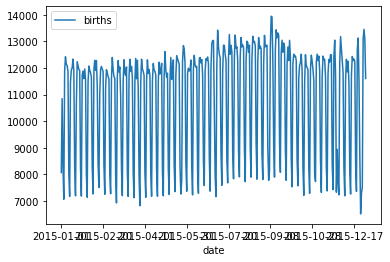

In [42]:
birth.plot()

#no particular trend shows here

In [53]:
#creating moving average

birth_mean = birth.rolling(window = 15).mean()

<AxesSubplot:xlabel='date'>

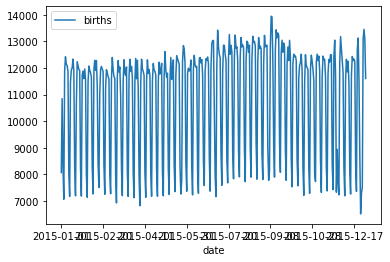

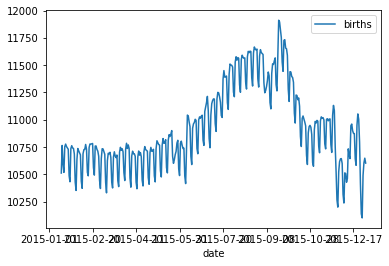

In [54]:
birth.plot()
birth_mean.plot()

#high trend visible here

In [55]:
#Creating Baseline model -> (Assumption) history is the best for future

In [57]:
value = pd.DataFrame(series_values)

In [59]:
birth = pd.concat([value,value.shift(1)], axis=1)

In [60]:
birth.head()

,0,0
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [61]:
birth.columns = ['actual_birth','forecast_birth']

In [62]:
birth.head()

,actual_birth,forecast_birth
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [63]:
# calulating error

In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [66]:
birth.dropna(inplace=True)

In [67]:
birth_error = mean_squared_error(birth.actual_birth,birth.forecast_birth)

In [68]:
birth_error

5162403.576923077

In [69]:
np.sqrt(birth_error)

2272.092334594498

In [70]:
#ARIMA 

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [72]:
#plot_acf is to identify parameter Q
# ARIMA (p,d,q)

In [75]:
birth.head()

,actual_birth,forecast_birth
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0


In [85]:
birth1 = pd.Series(birth["births"].values, index=birth.index)

In [86]:
birth1

date
2015-01-01     8068
2015-01-02    10850
2015-01-03     8328
2015-01-04     7065
2015-01-05    11892
              ...  
2015-12-27     7518
2015-12-28    13100
2015-12-29    13458
2015-12-30    13100
2015-12-31    11608
Length: 365, dtype: int64

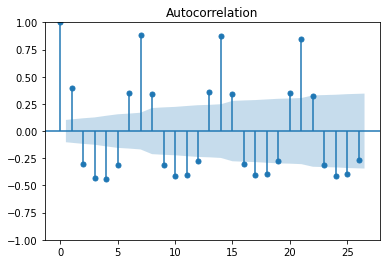

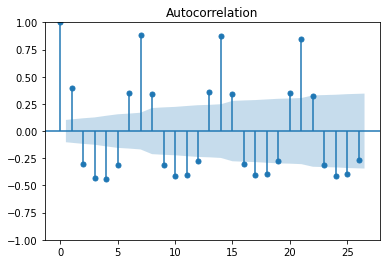

In [87]:
plot_acf(birth1) #identify q

C:\Users\danie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


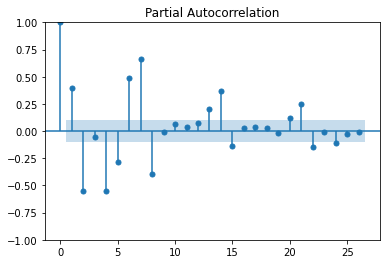

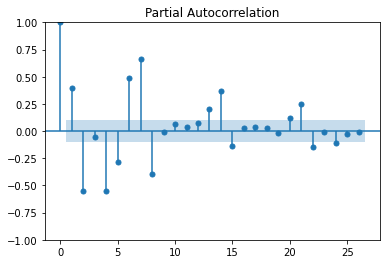

In [88]:
plot_pacf(birth1) #identify p 

In [89]:
#p = 1,2, d= 0 , q = 3

birth1.size

365

In [90]:
birth_train = birth1[0:330]
birth_test = birth1[330:365]

In [91]:
birth_train.size

330

In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [110]:
birth_model = ARIMA(birth_train, order=(3,1,5))

C:\Users\danie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\danie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\danie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [111]:
birth_model_fit = birth_model.fit()

C:\Users\danie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\danie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [112]:
birth_model_fit.aic

5710.4321142139215

In [113]:
birth_forecast = birth_model_fit.forecast(steps=35)

In [114]:
birth_forecast

2015-11-27     7911.741607
2015-11-28     6463.237664
2015-11-29     8925.837834
2015-11-30    11622.599282
2015-12-01    11318.497132
2015-12-02     9571.290599
2015-12-03    10847.127648
2015-12-04    12072.705311
2015-12-05    10265.687488
2015-12-06     9847.162615
2015-12-07    11838.312088
2015-12-08    11372.021195
2015-12-09     9590.708885
2015-12-10    10847.590438
2015-12-11    12068.231417
2015-12-12    10270.869831
2015-12-13     9850.213064
2015-12-14    11831.995688
2015-12-15    11371.832152
2015-12-16     9597.113245
2015-12-17    10844.937611
2015-12-18    12063.014735
2015-12-19    10275.836365
2015-12-20     9853.216757
2015-12-21    11825.701702
2015-12-22    11371.628125
2015-12-23     9603.489370
2015-12-24    10842.309264
2015-12-25    12057.814646
2015-12-26    10280.770904
2015-12-27     9856.218050
2015-12-28    11819.440723
2015-12-29    11371.411833
2015-12-30     9609.837978
2015-12-31    10839.705388
Freq: D, Name: predicted_mean, dtype: float64

In [115]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

2064.4091781269244

In [ ]:
# error is a little less than we predicted by shifts